GEOPANDAS: TRABALHANDO COM DADOS GEOESPACIAIS

APRESENTAÇÂO

Uma empresa de turismo quer mapear as opções de atividades culturais em São Paulo, de acordo com a proximidade do metrô.


OBJETIVO

 * Mapear os locais culturais mais próximos das estações de metrô, especificamente da linha vermelha :station:


BIBLIOTECA E DADOS

* Carregar os pacotes

In [67]:
!pip install geopandas
!pip install matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

 * carregar o mapa do Estado de São Paulo

In [68]:
file_path = 'SP_Municipios_2023.shp'


In [69]:
data = gpd.read_file(file_path)


<Axes: >

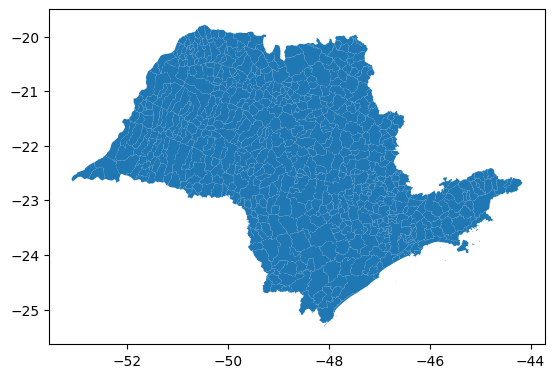

In [70]:
data.plot()

<Axes: >

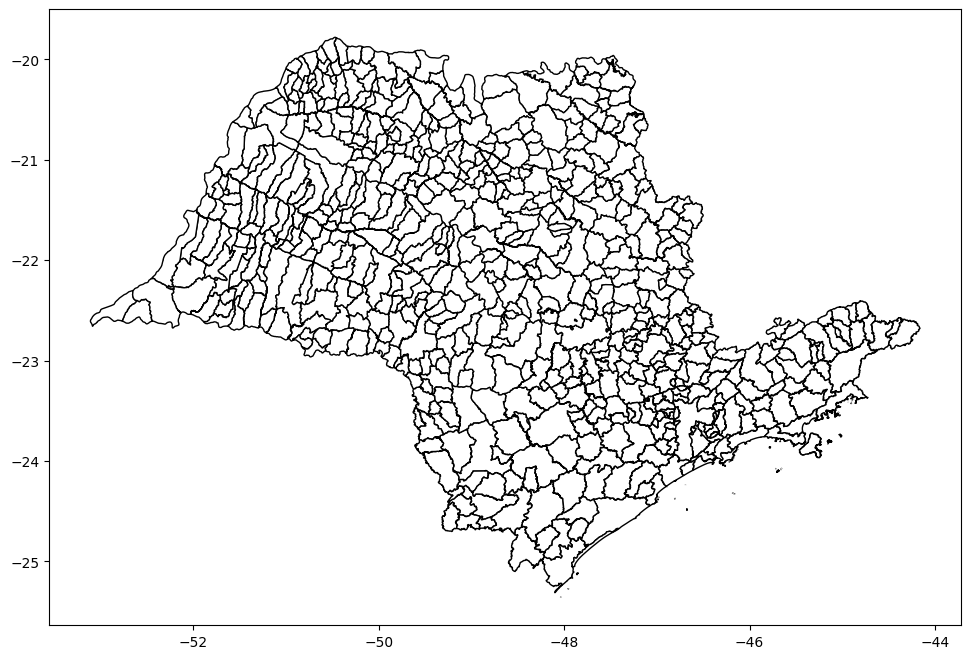

In [71]:
data.plot(color='white',edgecolor='black',figsize=(15,8))

* Filtrar e gerar um GeoDataFrame -> Mapa da cidade de São Paulo.

In [72]:
sp = data[data['NM_MUN']=='São Paulo']

<Axes: >

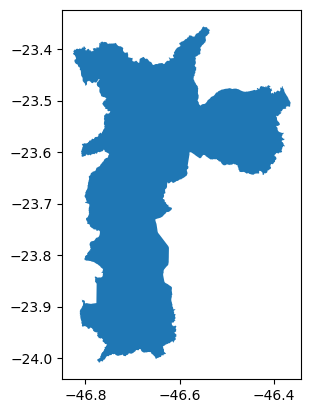

In [73]:
sp.plot()

<Axes: >

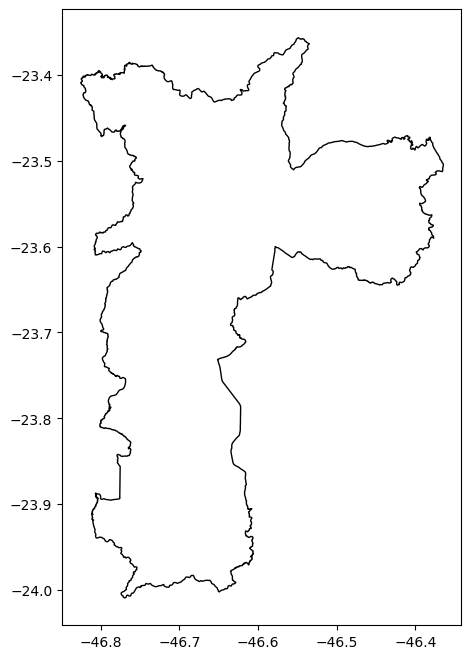

In [74]:
sp.plot(color='white',edgecolor='black',figsize=(15,8))

* Carregar dataset informações metrô

Informações Metrô

In [75]:
url_m = 'https://github.com/Oliveira-LE/Geopandas/raw/main/SIRGAS_SHP_estacaometro_point.shp'
metro = gpd.read_file(url_m)
metro.head()

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349839.38 7395675.047)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348457.592 7395884.165)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346732.712 7396874.617)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343708.935 7396765.736)


<Axes: >

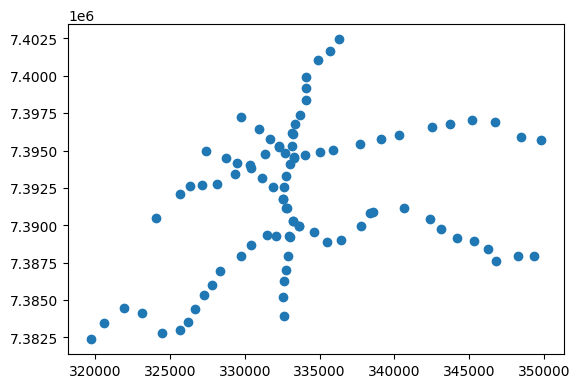

In [76]:
metro.plot()

In [77]:
metro['emt_linha'].unique()

array(['VERMELHA', 'VERDE', 'AZUL', 'PRATA', 'LILAS', 'AMARELA'],
      dtype=object)

In [78]:
linha_vermelha = metro[metro['emt_linha']=='VERMELHA']

In [79]:
linha_verde = metro[metro['emt_linha']=='VERDE']

In [80]:
linha_azul = metro[metro['emt_linha']=='AZUL']

In [81]:
linha_prata = metro[metro['emt_linha']=='PRATA']

In [82]:
linha_lilas = metro[metro['emt_linha']=='LILAS']

In [83]:
linha_amarela = metro[metro['emt_linha']=='AMARELA']

* Carregar dataset informações centros culturais

In [97]:
url_c = 'https://github.com/Oliveira-LE/Geopandas/raw/main/SIRGAS_SHP_TEMA_-_CULTURA_TEATRO-CINEMA-SHOW.shp'
cultura = gpd.read_file(url_c)
cultura.head()

,eq_esfera,eq_tipo,eq_nome,eq_enderec,eq_telefon,eq_bairro,eq_cep,eq_cd_esfe,eq_cd_tipo,eq_id,...,eq_cd_subp,eq_subpref,eq_regiao5,eq_regiao8,eq_espaco,eq_inaugur,eq_assento,eq_acessib,eq_estacio,geometry
0,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,617,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 1,20160427,158,None,None,POINT (323985.87 7406117.77)
1,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,618,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 2,20160427,199,None,None,POINT (323985.87 7406117.77)
2,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,619,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 3,20160427,161,None,None,POINT (323985.87 7406117.77)
3,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,620,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 4,20160427,131,None,None,POINT (323985.87 7406117.77)
4,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,621,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 5,20160427,122,None,None,POINT (323985.87 7406117.77)


* Adicionar CRS adequado

In [98]:
metro = metro.set_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [99]:
sp = sp.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
sp.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

Informações Centros culturais

* Gerar um mapa que mostre todas as informações em conjunto.

In [100]:
cultura = cultura.set_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')

<Axes: >

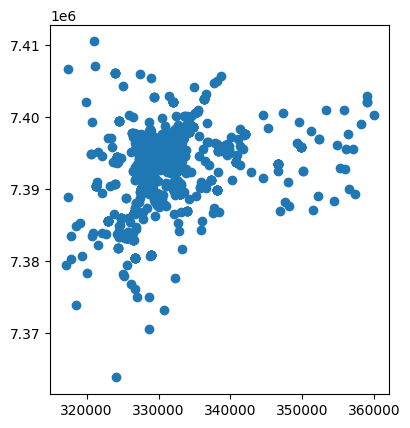

In [101]:
cultura.plot()

* Separar a localização das estações de metrô em um GeoDataFrame e mostrar esses dados no mapa.

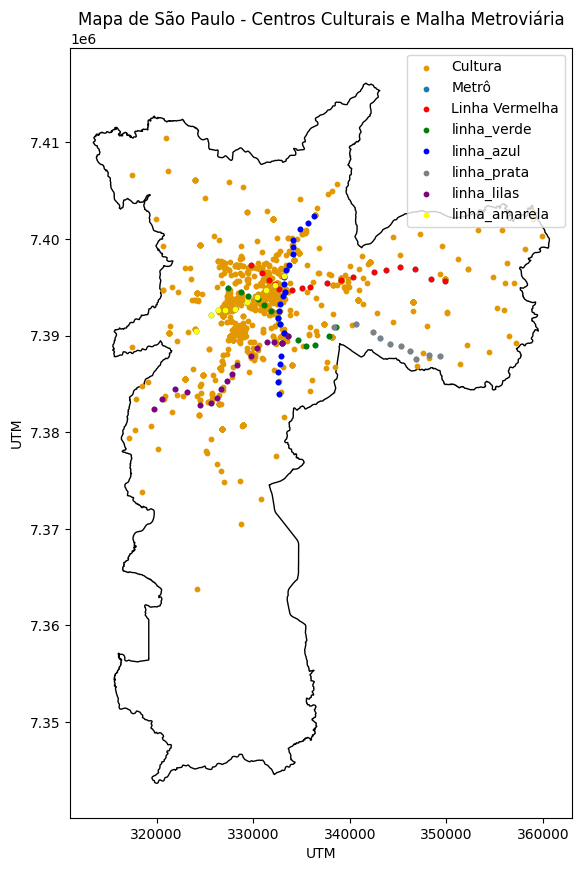

In [102]:
base = sp.plot(color='white', edgecolor='black',figsize=(15,10))
cultura.plot(ax=base, color='#e39802',markersize=10,figsize=(15,10))
metro.plot(ax=base,markersize=10,figsize=(15,10))
linha_vermelha.plot(ax=base,color='red',markersize=10,figsize=(15,10))
linha_verde.plot(ax=base,color='green',markersize=10,figsize=(15,10))
linha_azul.plot(ax=base,color='blue',markersize=10,figsize=(15,10))
linha_prata.plot(ax=base,color='grey',markersize=10,figsize=(15,10))
linha_lilas.plot(ax=base,color='purple',markersize=10,figsize=(15,10))
linha_amarela.plot(ax=base,color='yellow',markersize=10,figsize=(15,10))
plt.xlabel('UTM')
plt.ylabel('UTM')
plt.title('Mapa de São Paulo - Centros Culturais e Malha Metroviária')
base.legend(['Cultura','Metrô','Linha Vermelha', 'linha_verde', 'linha_azul', 'linha_prata', 'linha_lilas', 'linha_amarela'],loc='upper right')

* Quais são os 10 centros culturais mais próximos das estações de metrô ?

In [103]:
cultura['Dist_Transporte'] = cultura['geometry'].apply(lambda x: linha_vermelha.distance(x).min())
cultura.head()

,eq_esfera,eq_tipo,eq_nome,eq_enderec,eq_telefon,eq_bairro,eq_cep,eq_cd_esfe,eq_cd_tipo,eq_id,...,eq_subpref,eq_regiao5,eq_regiao8,eq_espaco,eq_inaugur,eq_assento,eq_acessib,eq_estacio,geometry,Dist_Transporte
0,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,617,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 1,20160427,158,None,None,POINT (323985.87 7406117.77),10577.306987
1,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,618,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 2,20160427,199,None,None,POINT (323985.87 7406117.77),10577.306987
2,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,619,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 3,20160427,161,None,None,POINT (323985.87 7406117.77),10577.306987
3,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,620,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 4,20160427,131,None,None,POINT (323985.87 7406117.77),10577.306987
4,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,621,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 5,20160427,122,None,None,POINT (323985.87 7406117.77),10577.306987


* Mostrar os 10 centros em conjunto com seus endereços disponíveis no GeoDataFrame de centros culturais.

In [104]:
cultura['eq_tipo'].unique()

array(['SALAS DE CINEMA', 'SALAS DE TEATRO', 'SALAS DE SHOWS E CONCERTOS',
       'SALAS DE TEATRO E SHOWS E CONCERTOS', 'TEATRO E CINEMA'],
      dtype=object)

In [105]:
cultura_ordenado = cultura.sort_values("Dist_Transporte")

cultura_ordenado[['eq_enderec','Dist_Transporte']].head(10)

,eq_enderec,Dist_Transporte
484,"PC DA REPÚBLICA, 53",61.900359
538,"R FREDERICO ABRANCHES, 118",102.630982
401,"AV RADIAL LESTE, S/N",110.310924
59,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
58,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
57,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
61,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
62,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
55,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
56,"R DOMINGOS AGOSTIM, 91 - PISO G2",112.510509
